In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  1


In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.0 MB/s eta 0:00:38
   ---------------------------------------- 0.2/38.6 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.2/38.6 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.5/38.6 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.5/38.6 MB 2.4 MB/s eta 0:00:17
   - -------------------------------------- 1.0/38.6 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.8/38.6 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.3/38.6 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.3/38.6 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/38.6 MB 5.8 MB/s eta 0:00:07
   -- --------------

In [1]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Aneesh PB\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tok

In [2]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Specify dataset folder structure
folders = ['Normal cases', 'Bengin cases', 'Malignant cases']

# Load the dataset
def load_data(data_dir):
    images = []
    labels = []

    for label in folders:
        label_path = os.path.join(data_dir, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))  # Resize the images to a fixed size
            images.append(image)
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Preprocess the data
def preprocess_data(images, labels):
    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    num_classes = len(np.unique(labels))
    labels = to_categorical(labels, num_classes=num_classes)  # Ensure one-hot encoding with correct number of classes
    
    # Normalize pixel values
    images = images.astype('float32') / 255.0

    return images, labels, label_encoder

# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),  # Dropout added
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),  # Dropout added
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.4),  # Dropout added
        
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Load the dataset
data_dir = "C:\\Users\\Aneesh PB\\Downloads\\Topology Project\\Full segment\\Images\\"
images, labels = load_data(data_dir)

# Preprocess the data
images, labels, label_encoder = preprocess_data(images, labels)

# Split the dataset into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(images, labels, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=2)

# Determine the number of classes
num_classes = y_train.shape[1]

# Create the CNN model
input_shape = X_train.shape[1:]
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Generate predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Map class indices back to class names
class_names = label_encoder.classes_

# Generate and print classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print("Classification Report:\n", report)

# Print validation accuracy during training
val_acc = history.history['val_accuracy']
print('Validation accuracy during training:', val_acc)


Epoch 1/100
22/22 [==============================] - 10s 101ms/step - loss: 0.9545 - accuracy: 0.5627 - val_loss: 0.8150 - val_accuracy: 0.6744
Epoch 2/100
22/22 [==============================] - 1s 48ms/step - loss: 0.7625 - accuracy: 0.6808 - val_loss: 0.6793 - val_accuracy: 0.7558
Epoch 3/100
22/22 [==============================] - 1s 46ms/step - loss: 0.6680 - accuracy: 0.7289 - val_loss: 0.6019 - val_accuracy: 0.7674
Epoch 4/100
22/22 [==============================] - 1s 46ms/step - loss: 0.5392 - accuracy: 0.7915 - val_loss: 0.4135 - val_accuracy: 0.8198
Epoch 5/100
22/22 [==============================] - 1s 46ms/step - loss: 0.4199 - accuracy: 0.8265 - val_loss: 0.2835 - val_accuracy: 0.8663
Epoch 6/100
22/22 [==============================] - 1s 46ms/step - loss: 0.3439 - accuracy: 0.8630 - val_loss: 0.2767 - val_accuracy: 0.8779
Epoch 7/100
22/22 [==============================] - 1s 47ms/step - loss: 0.2869 - accuracy: 0.8761 - val_loss: 0.2065 - val_accuracy: 0.9128
Epoc

In [3]:
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score
import numpy as np

# Predict probabilities and class labels
y_pred_probs = model.predict(X_test)  # Predicted probabilities (shape: num_samples x num_classes)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # True class indices

# Generate class-wise Precision, Recall, F1-Score using classification_report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

# Compute PR-AUC and ROC-AUC for each class
pr_auc_per_class = {}
roc_auc_per_class = {}
class_accuracies = {}  # To store class-wise accuracies

for i, class_name in enumerate(folders):
    # Compute PR-AUC and ROC-AUC
    pr_auc = average_precision_score(y_test[:, i], y_pred_probs[:, i])
    roc_auc = roc_auc_score(y_test[:, i], y_pred_probs[:, i])
    pr_auc_per_class[class_name] = pr_auc
    roc_auc_per_class[class_name] = roc_auc

    # Compute class-wise accuracy
    class_indices = np.where(y_true_classes == i)[0]  # Indices of samples belonging to this class
    correct_predictions = np.sum(y_pred_classes[class_indices] == y_true_classes[class_indices])
    class_accuracy = correct_predictions / len(class_indices)
    class_accuracies[class_name] = class_accuracy

# Print class-wise metrics
print("\nClass-wise Metrics Summary:")
for class_name in folders:
    precision = report[class_name]["precision"]
    recall = report[class_name]["recall"]
    f1_score = report[class_name]["f1-score"]
    accuracy = class_accuracies[class_name]
    pr_auc = pr_auc_per_class[class_name]
    roc_auc = roc_auc_per_class[class_name]

    print(f"\nClass: {class_name}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")


7/7 [==============================] - 0s 11ms/step

Class-wise Metrics Summary:

Class: Normal cases
Precision: 0.9722
Recall: 0.9459
F1-Score: 0.9589
Accuracy: 0.8947
PR-AUC: 0.9489
ROC-AUC: 0.9922

Class: Bengin cases
Precision: 0.8947
Recall: 0.8947
F1-Score: 0.8947
Accuracy: 1.0000
PR-AUC: 0.9997
ROC-AUC: 0.9996

Class: Malignant cases
Precision: 0.9839
Recall: 1.0000
F1-Score: 0.9919
Accuracy: 0.9459
PR-AUC: 0.9939
ROC-AUC: 0.9965


In [4]:
# Accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Get the predicted class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Precision, Recall, and F1-Score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_probs, average='weighted', multi_class='ovr')

# PR-AUC
pr_auc = average_precision_score(y_test, y_pred_probs, average='weighted')

# Print the metrics

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


7/7 [==============================] - 0s 11ms/step
Precision: 0.9720
Recall: 0.9721
F1-Score: 0.9719
Accuracy: 0.9721
PR-AUC: 0.9932
ROC-AUC: 0.9979


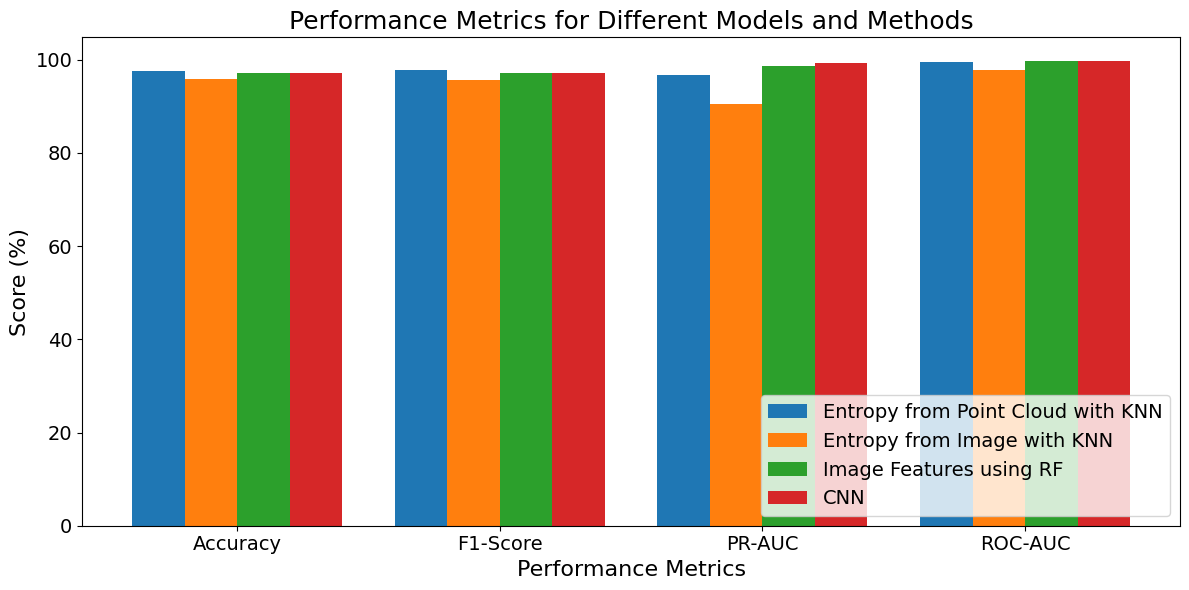

In [6]:
# Data for the plot

from matplotlib import pyplot as plt

methods = ["Entropy from Point Cloud with KNN", "Entropy from Image with KNN", "Image Features using RF", "CNN"]
metrics = ["Accuracy", "F1-Score", "PR-AUC", "ROC-AUC"]
data = [
    [97.67, 97.70, 96.63, 99.46],  # KNN (Point Cloud to Entropy)
    [95.91, 95.67, 90.55, 97.81],  # KNN (Direct Image to Entropy)
    [97.24, 97.23, 98.62, 99.77],  # Random Forest (Image Features)
    [97.21, 97.19, 99.39, 99.81]   # CNN (Classification)
]

# X-axis positions for each method
x = np.arange(len(metrics))
width = 0.2

# Create separate bars for each method with increased font size
# Create separate bars for each method with increased font size
plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    plt.bar(x + i * width, data[i], width, label=method)

# Formatting the plot with increased font sizes
plt.xticks(x + 1.5 * width, metrics, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Performance Metrics", fontsize=16)
plt.ylabel("Score (%)", fontsize=16)
plt.title("Performance Metrics for Different Models and Methods", fontsize=18)
plt.legend(loc="lower right", fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()
